# KNN Depth Estimation Demo

This notebook will illustrate how to use the [OpticalRS Python library](http://jkibele.github.io/OpticalRS/) to estimate depths as described in Kibele and Shears (not published yet).

In [1]:
%pylab inline
style.use('ggplot')
from OpticalRS import *
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


Change to the working directory to the location where the test data are stored.

In [2]:
cd ~/Documents/code_projects/OpticalRS/tests/data/

/home/jkibele/Documents/code_projects/OpticalRS/tests/data


Create a depth estimator object with the denoised WorldView-2 imagery sample and a raster of known depths.

In [3]:
de = DepthEstimator('eReefWV2_denoised.tif', 'BPS_adj_depth_raster_masked.tif')

Use the `DepthEstimator` object to estimate the depths:

In [4]:
depthest = de.knn_depth_estimation(k=5)

Display an RGB version of the multispectral imagery with raster of known depths overlayed. Then display the estimated depths. This step is just for display. It is not necessary for depth estimation.

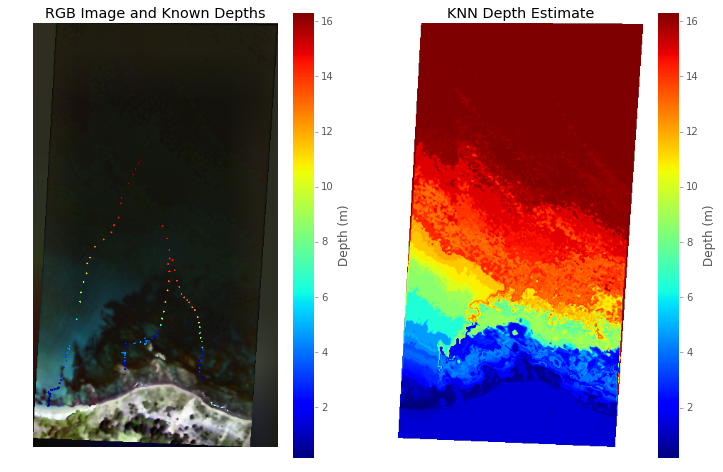

In [5]:
fig, (ax1, ax2) = subplots(1, 2, figsize=(12,8))
rgbarr = MSExposure.equalize_adapthist(de.imarr[...,[3,2,1]], clip_limit=0.02)
ax1.imshow(rgbarr)
mapable = ax1.imshow(de.known_depth_arr)
ax1.set_axis_off()
ax1.set_title("RGB Image and Known Depths")
blah = colorbar(mapable, ax=ax1, label='Depth (m)', cmap=mpl.cm.Spectral)

m2 = ax2.imshow(depthest, cmap=mpl.cm.jet)
blah = colorbar(m2, ax=ax2, label='Depth (m)')
ax2.set_title("KNN Depth Estimate")
ax2.set_axis_off()

Calculate root mean square error (RMSE) and plot estimated depths against measured depths. Because the same measured depths are being used for both training and evaluation, the RMSE will be better (lower) than it should be. In practice, the training and evaluation (test) sets should be different.

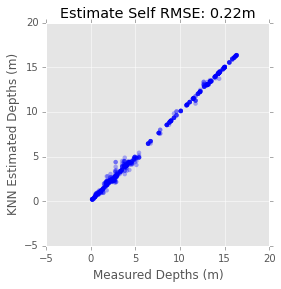

In [6]:
err = de.known_depth_arr - depthest
rmse = np.sqrt((err**2).mean())

scatter(de.known_depth_arr, depthest, edgecolor='none', alpha=0.3)
ax = gca()
titletxt = "Estimate Self RMSE: {:.2}m".format(rmse)
ax.set_title(titletxt)
ax.set_xlabel("Measured Depths (m)")
ax.set_ylabel("KNN Estimated Depths (m)")
ax.set_aspect('equal')